## Importing required Packages

In [1]:
import pandas as pd
import numpy as np
import time
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# datapath corresponnds to the path where the dataset is stored, 
# please go to the very first cell at the top and download the dataset and provide path to the stored location
datapath = "D:/Datasets/fifa19"
os.chdir(datapath)

In [3]:
df = pd.read_csv("data.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Photo", "Flag", "Club Logo", 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', "Loaned From", 'Real Face']

df.drop(columns=columns_to_drop, inplace = True)

In [5]:
# Taking first 1500 columns sorted on the basis of Overall, Potential, Special as it is easier to Plot.
df = df.sort_values(by = ["Overall", "Potential", "Special"], ascending = False).head(1500)

In [6]:
df.head()

Name  Age Nationality  Overall  Potential  \
1  Cristiano Ronaldo   33    Portugal       94         94   
0           L. Messi   31   Argentina       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special Preferred Foot  ...  \
1             Juventus     €77M  €405K     2228          Right  ...   
0         FC Barcelona  €110.5M  €565K     2202           Left  ...   
2  Paris Saint-Germain  €118.5M  €290K     2143          Right  ...   
3    Manchester United     €72M  €260K     1471          Right  ...   
4      Manchester City    €102M  €355K     2281          Right  ...   

   Composure  Marking  StandingTackle SlidingTackle GKDiving GKHandling  \
1       95.0     28.0            31.0          23.0      7.0       11.0   
0       96.0     33.0            28.0          26.0      6.0       11.0   
2       94.0     27.0            24.0          33.0      9.0        9.0   
3       68.0     15.0            21.0          13.0     90.0       85.0   
4       88.0     68.0            58.0          51.0     15.0       13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
1       15.0          14.0       11.0        €127.1M  
0       15.0          14.0        8.0        €226.5M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 56 columns]

In [7]:
# Out of all 1500 players some players have some attributes not known as in the nan_players
nan_plyers = df[df.isnull().any(1)]

In [8]:
# dropping all the players from 1500 players who have one or the other attributes missing
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)

In [9]:
df.shape

(1406, 56)

In [10]:
# object datatype columns
#df.dtypes[df.dtypes == object].index.values

# non object datatype columns
#df.dtypes[df.dtypes != object].index.values

In [11]:
# seggregating the attribute columns into different categories for easier handling

identity_features = ['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot',
                     'Work Rate', 'Position', 'Joined',
                     'Contract Valid Until', 'Height', 'Weight']

money_features = ['Value', 'Wage', 'Release Clause']

attribute_features = ['Overall', 'Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

## Feature Engineering

In [13]:
first = df[identity_features]
second = df[money_features]
third = df[attribute_features]

In [14]:
#first["Position"].value_counts()

In [15]:
# Nationality mapping on the basis of their probability of occurence
nationality_counts = {country: count for country, count in zip(first["Nationality"].value_counts().index, first["Nationality"].value_counts().values)}
nationality_ratios = {country : np.round(count / 1406, 3) for country, count in nationality_counts.items()}

In [16]:
# Club Mapping on the basis of their probability of occurence
club_counts = {club: count for club, count in zip(first["Club"].value_counts().index, first["Club"].value_counts().values)}
club_ratios = {club : np.round(count / 1406, 3) for club, count in club_counts.items()}

In [17]:
# Preferred Foot Mapping on the basis of their probability of occurence
foot_counts = {foot : count for foot, count in zip(first["Preferred Foot"].value_counts().index, first["Preferred Foot"].value_counts().values)}
foot_ratios = {foot : np.round(count / 1406, 3) for foot, count in foot_counts.items()}

In [18]:
# Work Rate Mapping on the basis of their probability of occurence
work_counts = {work : count for work, count in zip(first["Work Rate"].value_counts().index, first["Work Rate"].value_counts().values)}
work_ratios = {work : np.round(count / 1406, 3) for work, count in work_counts.items()}

In [19]:
# Position Mapping on the basis of their probability of occurence
position_counts = {position : count for position, count in zip(first["Position"].value_counts().index, first["Position"].value_counts().values)}
position_ratios = {position : np.round(count / 1406, 3) for position, count in position_counts.items()}

In [20]:
def joined_year(rows):
    if len(rows["Joined"].split(",")) == 2:
        return rows["Joined"].split(",")[1]
    else:
        return np.nan

first["Joined Year"] = first.apply(joined_year, axis = "columns")
first["Contract Valid Until"] = first["Contract Valid Until"].astype(int)
first["Joined Year"] = first["Joined Year"].astype(int)
first["Years in Contract"] = first["Contract Valid Until"] - first["Joined Year"]

In [21]:
def convert_height(rows):
    """
    Converting the height which is in feet, inches to centimeter.
    1 feet = 30.48 centimeter
    1 inch = 2.54 centimeter
    """
    if len(rows["Height"].split("'")) == 2:
        return int(rows["Height"].split("'")[0]) * 30.48 + int(rows["Height"].split("'")[1]) * 2.54
    else:
        return np.nan

first["Height(cm)"] = first.apply(convert_height, axis = "columns")

In [22]:
def convert_weight(rows):
    """
    Converting the weight which is in pounds to Kgs.
    1 pound = 0.453592 kgs
    """
    if not pd.isnull(rows["Weight"]):
        return int(re.findall("[\d]+", rows["Weight"])[0]) * 0.453592
    else:
        return np.nan

first["Weight(kg)"] = first.apply(convert_weight, axis = "columns")

In [23]:
first["Nationality"] = first["Nationality"].map(nationality_ratios)
first["Club"] = first["Club"].map(club_ratios)
first["Preferred Foot"] = first["Preferred Foot"].map(foot_ratios)
first["Work Rate"] = first["Work Rate"].map(work_ratios)
first["Position"] = first["Position"].map(position_ratios)

In [24]:
first.columns

Index(['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot', 'Work Rate',
       'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Joined Year', 'Years in Contract', 'Height(cm)', 'Weight(kg)'],
      dtype='object')

In [25]:
columns_to_take = ['Nationality', 'Age', 'Club', 'Preferred Foot', 'Work Rate',
       'Position', 'Years in Contract', 'Height(cm)', 'Weight(kg)']

first = first[columns_to_take]

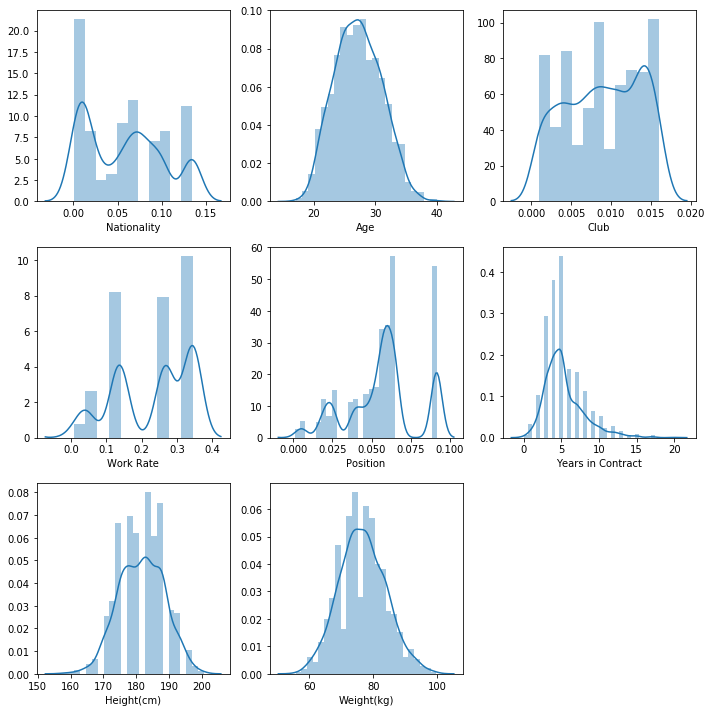

In [26]:
# Originial Values
fig = plt.figure(figsize = (10,10))

cols = [c for c in columns_to_take if c not in ["Preferred Foot"]]

for i in range(len(cols)):
    #print(cols[i])
    fig.add_subplot(3, 3, i+1)
    sns.distplot(first[cols[i]])

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_first = pd.DataFrame(scaler.fit_transform(first[cols]), columns = cols)

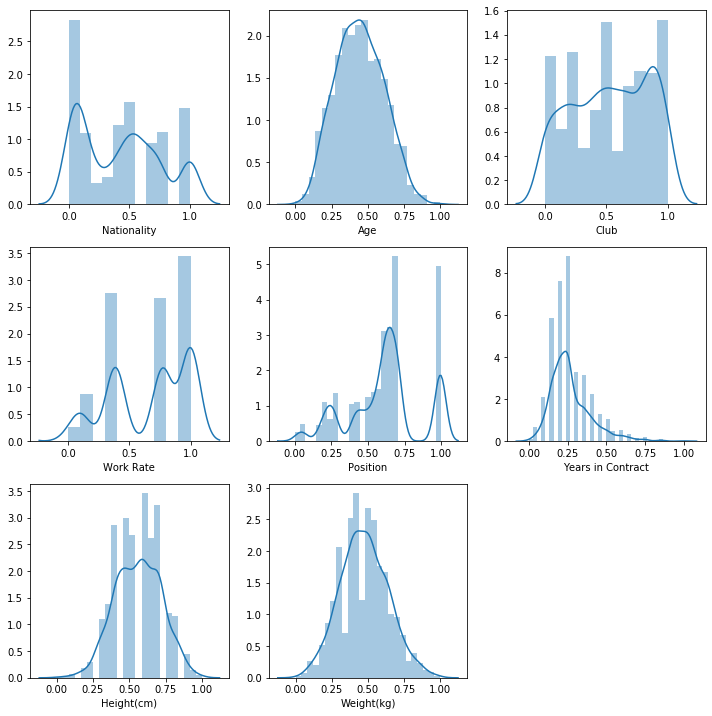

In [28]:
## Min Max Scaled Values
fig = plt.figure(figsize = (10,10))

cols = [c for c in columns_to_take if c not in ["Preferred Foot"]]

for i in range(len(cols)):
    #print(cols[i])
    fig.add_subplot(3, 3, i+1)
    sns.distplot(scaled_first[cols[i]])

plt.tight_layout()
plt.show()

In [29]:
def convert_currency(rows):
    if rows[-1] == "M":
        return float(rows[1:-1])
    elif rows[-1] == "K":
        return float(rows[1:-1]) / 1000000
    else:
        return np.nan

second["Value(Million)"] = second["Value"].apply(convert_currency)
second["Wage(Million)"] = second["Wage"].apply(convert_currency)
second["Release Clause(Million)"] = second["Release Clause"].apply(convert_currency)

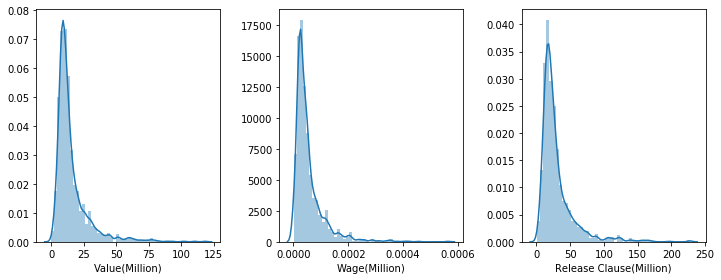

In [30]:
columns_to_take = ['Value(Million)', 'Wage(Million)', 'Release Clause(Million)']

fig = plt.figure(figsize = (10, 4))
for i in range(len(columns_to_take)):
    fig.add_subplot(1, 3, i+1)
    sns.distplot(second[columns_to_take[i]])
    
plt.tight_layout()
plt.show()

In [31]:
scaler = MinMaxScaler()
scaled_second = pd.DataFrame(scaler.fit_transform(second[columns_to_take]), columns = columns_to_take)

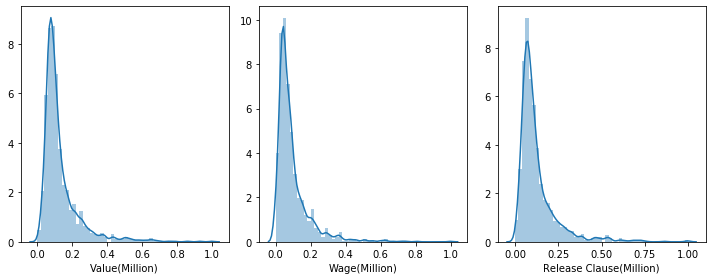

In [32]:
columns_to_take = ['Value(Million)', 'Wage(Million)', 'Release Clause(Million)']

fig = plt.figure(figsize = (10, 4))
for i in range(len(columns_to_take)):
    fig.add_subplot(1, 3, i+1)
    sns.distplot(scaled_second[columns_to_take[i]])
    
plt.tight_layout()
plt.show()

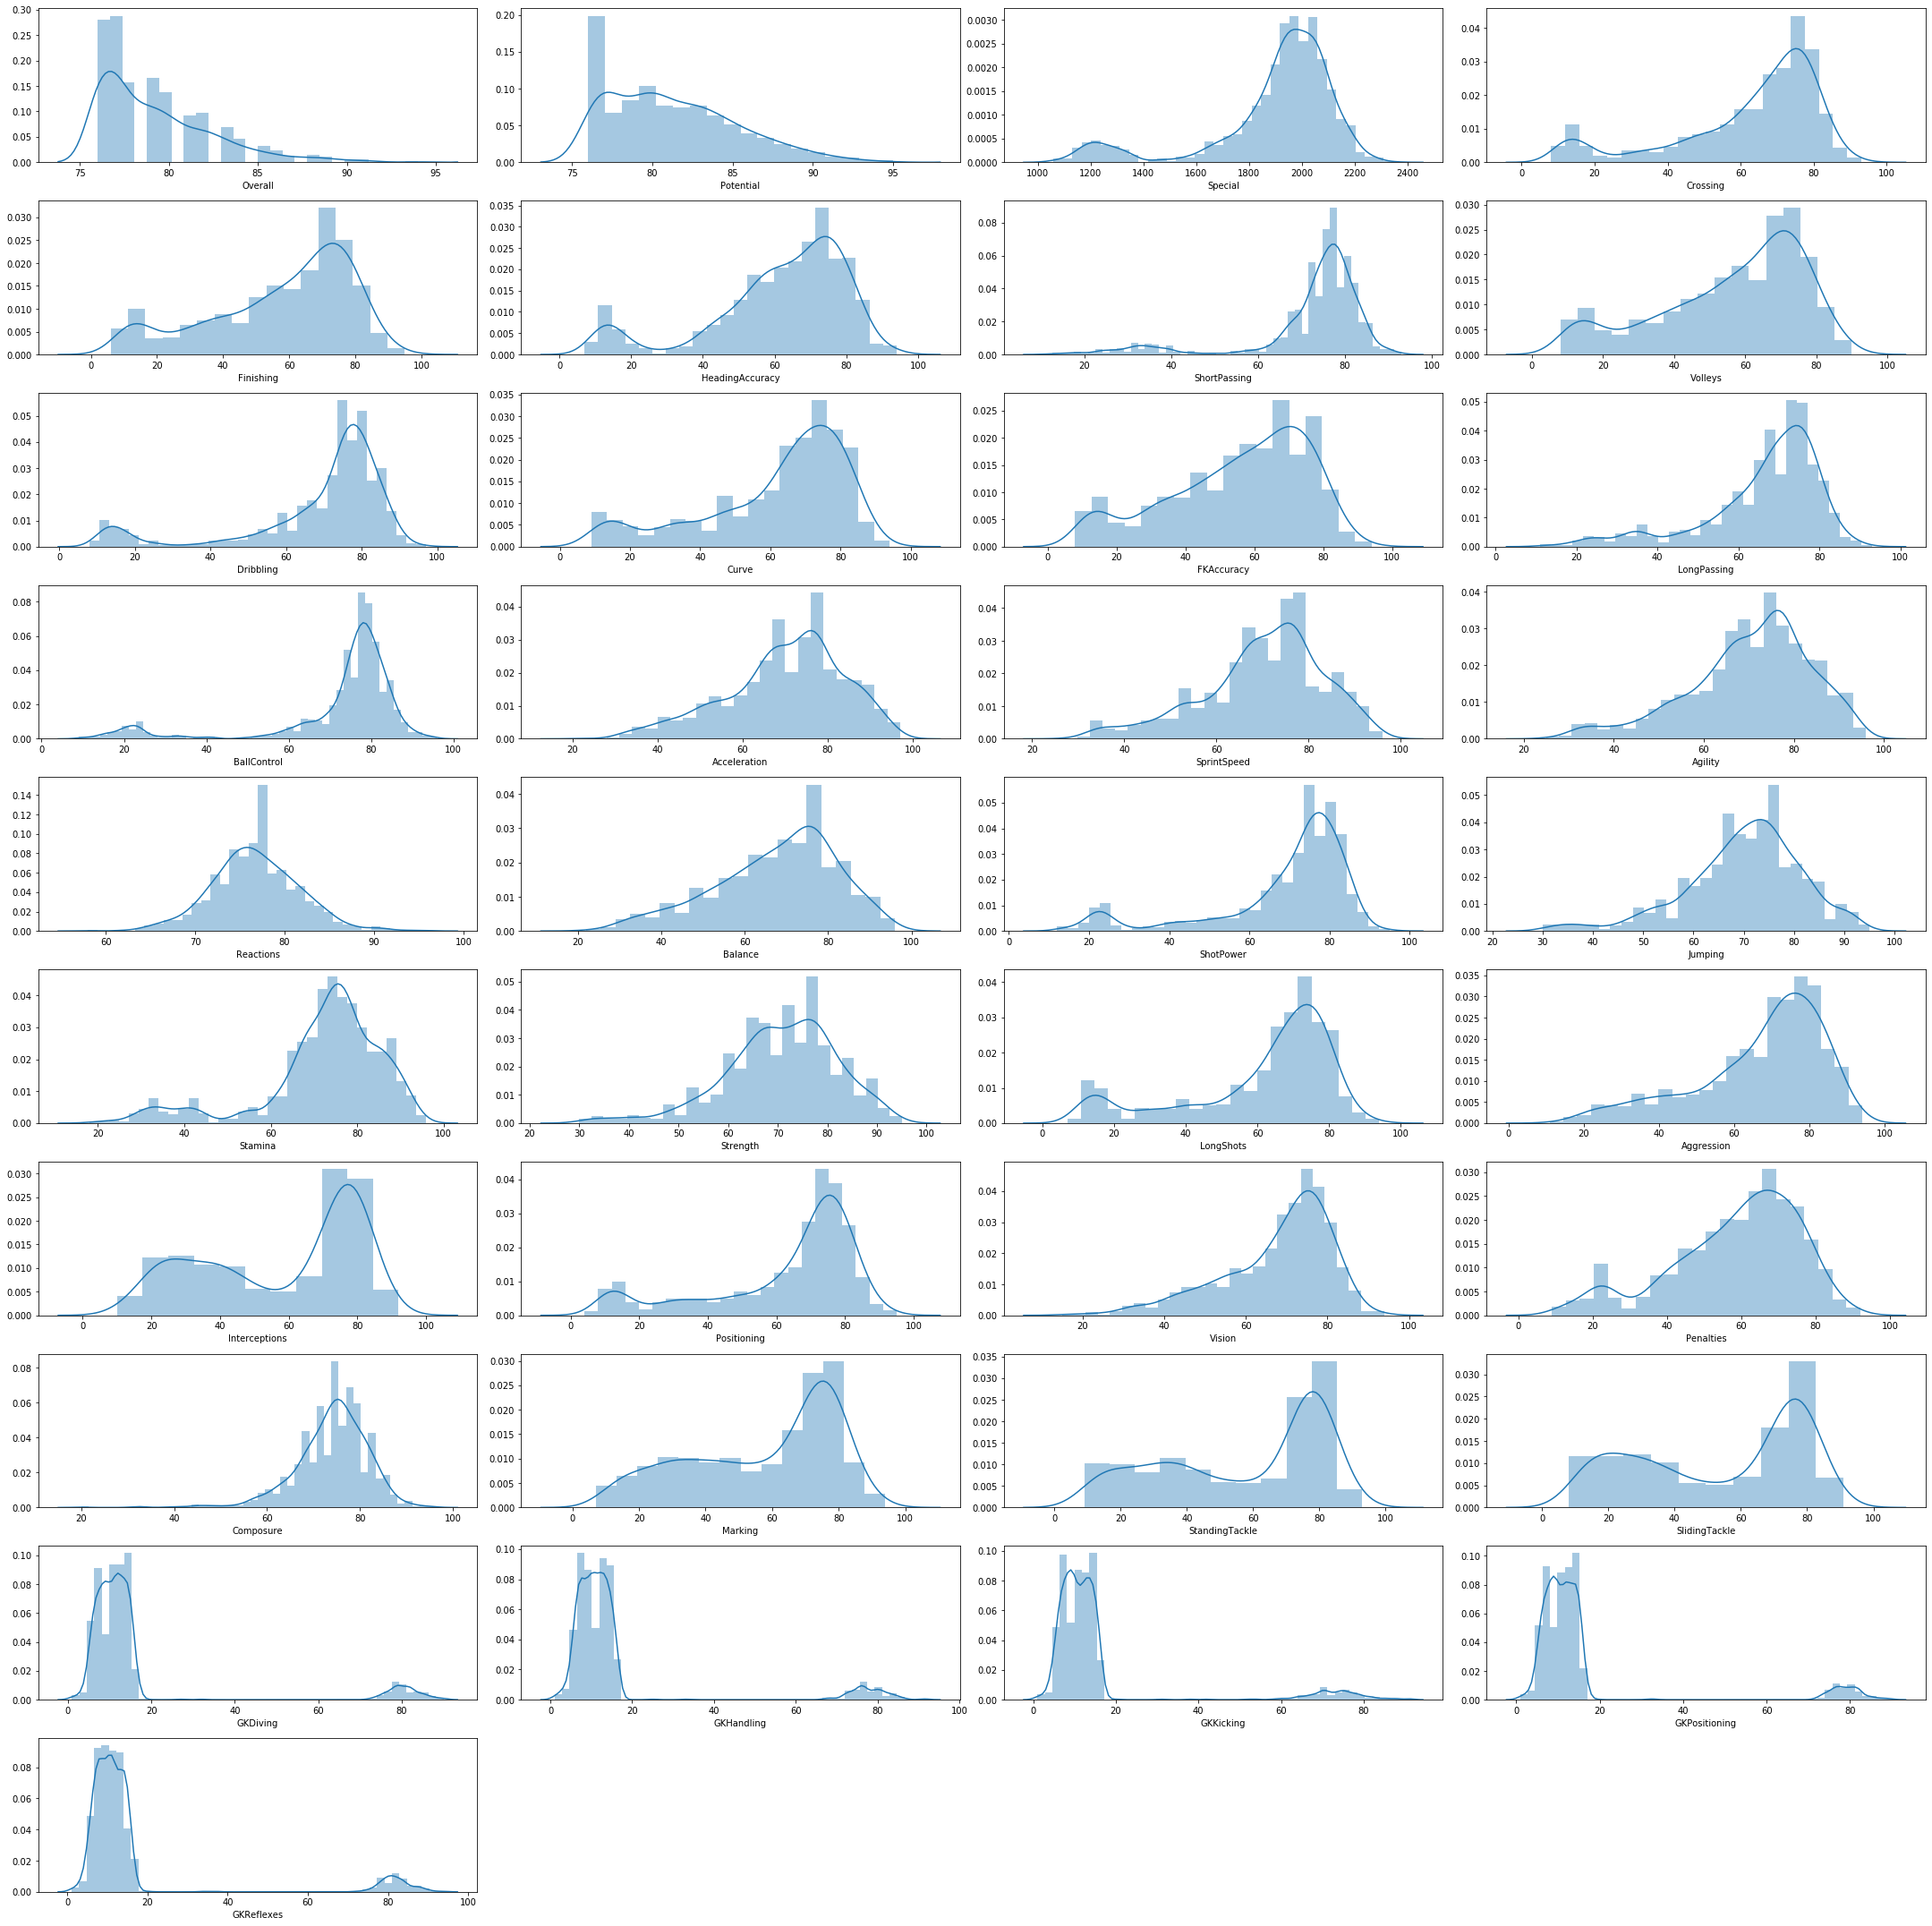

In [33]:
fig = plt.figure(figsize = (30, 30))
not_select = ["International Reputation", "Weak Foot", "Skill Moves", "Jersey Number"]
cols = [c for c in third.columns.values if c not in not_select]

for i in range(len(cols)):
    fig.add_subplot(10, 4, i+1)
    sns.distplot(third[cols[i]])

plt.tight_layout()
plt.show()

In [34]:
for col in cols:
    third["log_" + col] = np.log1p(third[col]) * 6

In [35]:
log_third_columns = ['log_Overall',
       'log_Potential', 'log_Special', 'log_Crossing', 'log_Finishing',
       'log_HeadingAccuracy', 'log_ShortPassing', 'log_Volleys',
       'log_Dribbling', 'log_Curve', 'log_FKAccuracy', 'log_LongPassing',
       'log_BallControl', 'log_Acceleration', 'log_SprintSpeed', 'log_Agility',
       'log_Reactions', 'log_Balance', 'log_ShotPower', 'log_Jumping',
       'log_Stamina', 'log_Strength', 'log_LongShots', 'log_Aggression',
       'log_Interceptions', 'log_Positioning', 'log_Vision', 'log_Penalties',
       'log_Composure', 'log_Marking', 'log_StandingTackle',
       'log_SlidingTackle', 'log_GKDiving', 'log_GKHandling', 'log_GKKicking',
       'log_GKPositioning', 'log_GKReflexes']

log_third = third[log_third_columns]

In [36]:
scaler = MinMaxScaler()
scaled_third = pd.DataFrame(scaler.fit_transform(third[log_third_columns]), columns = log_third_columns)

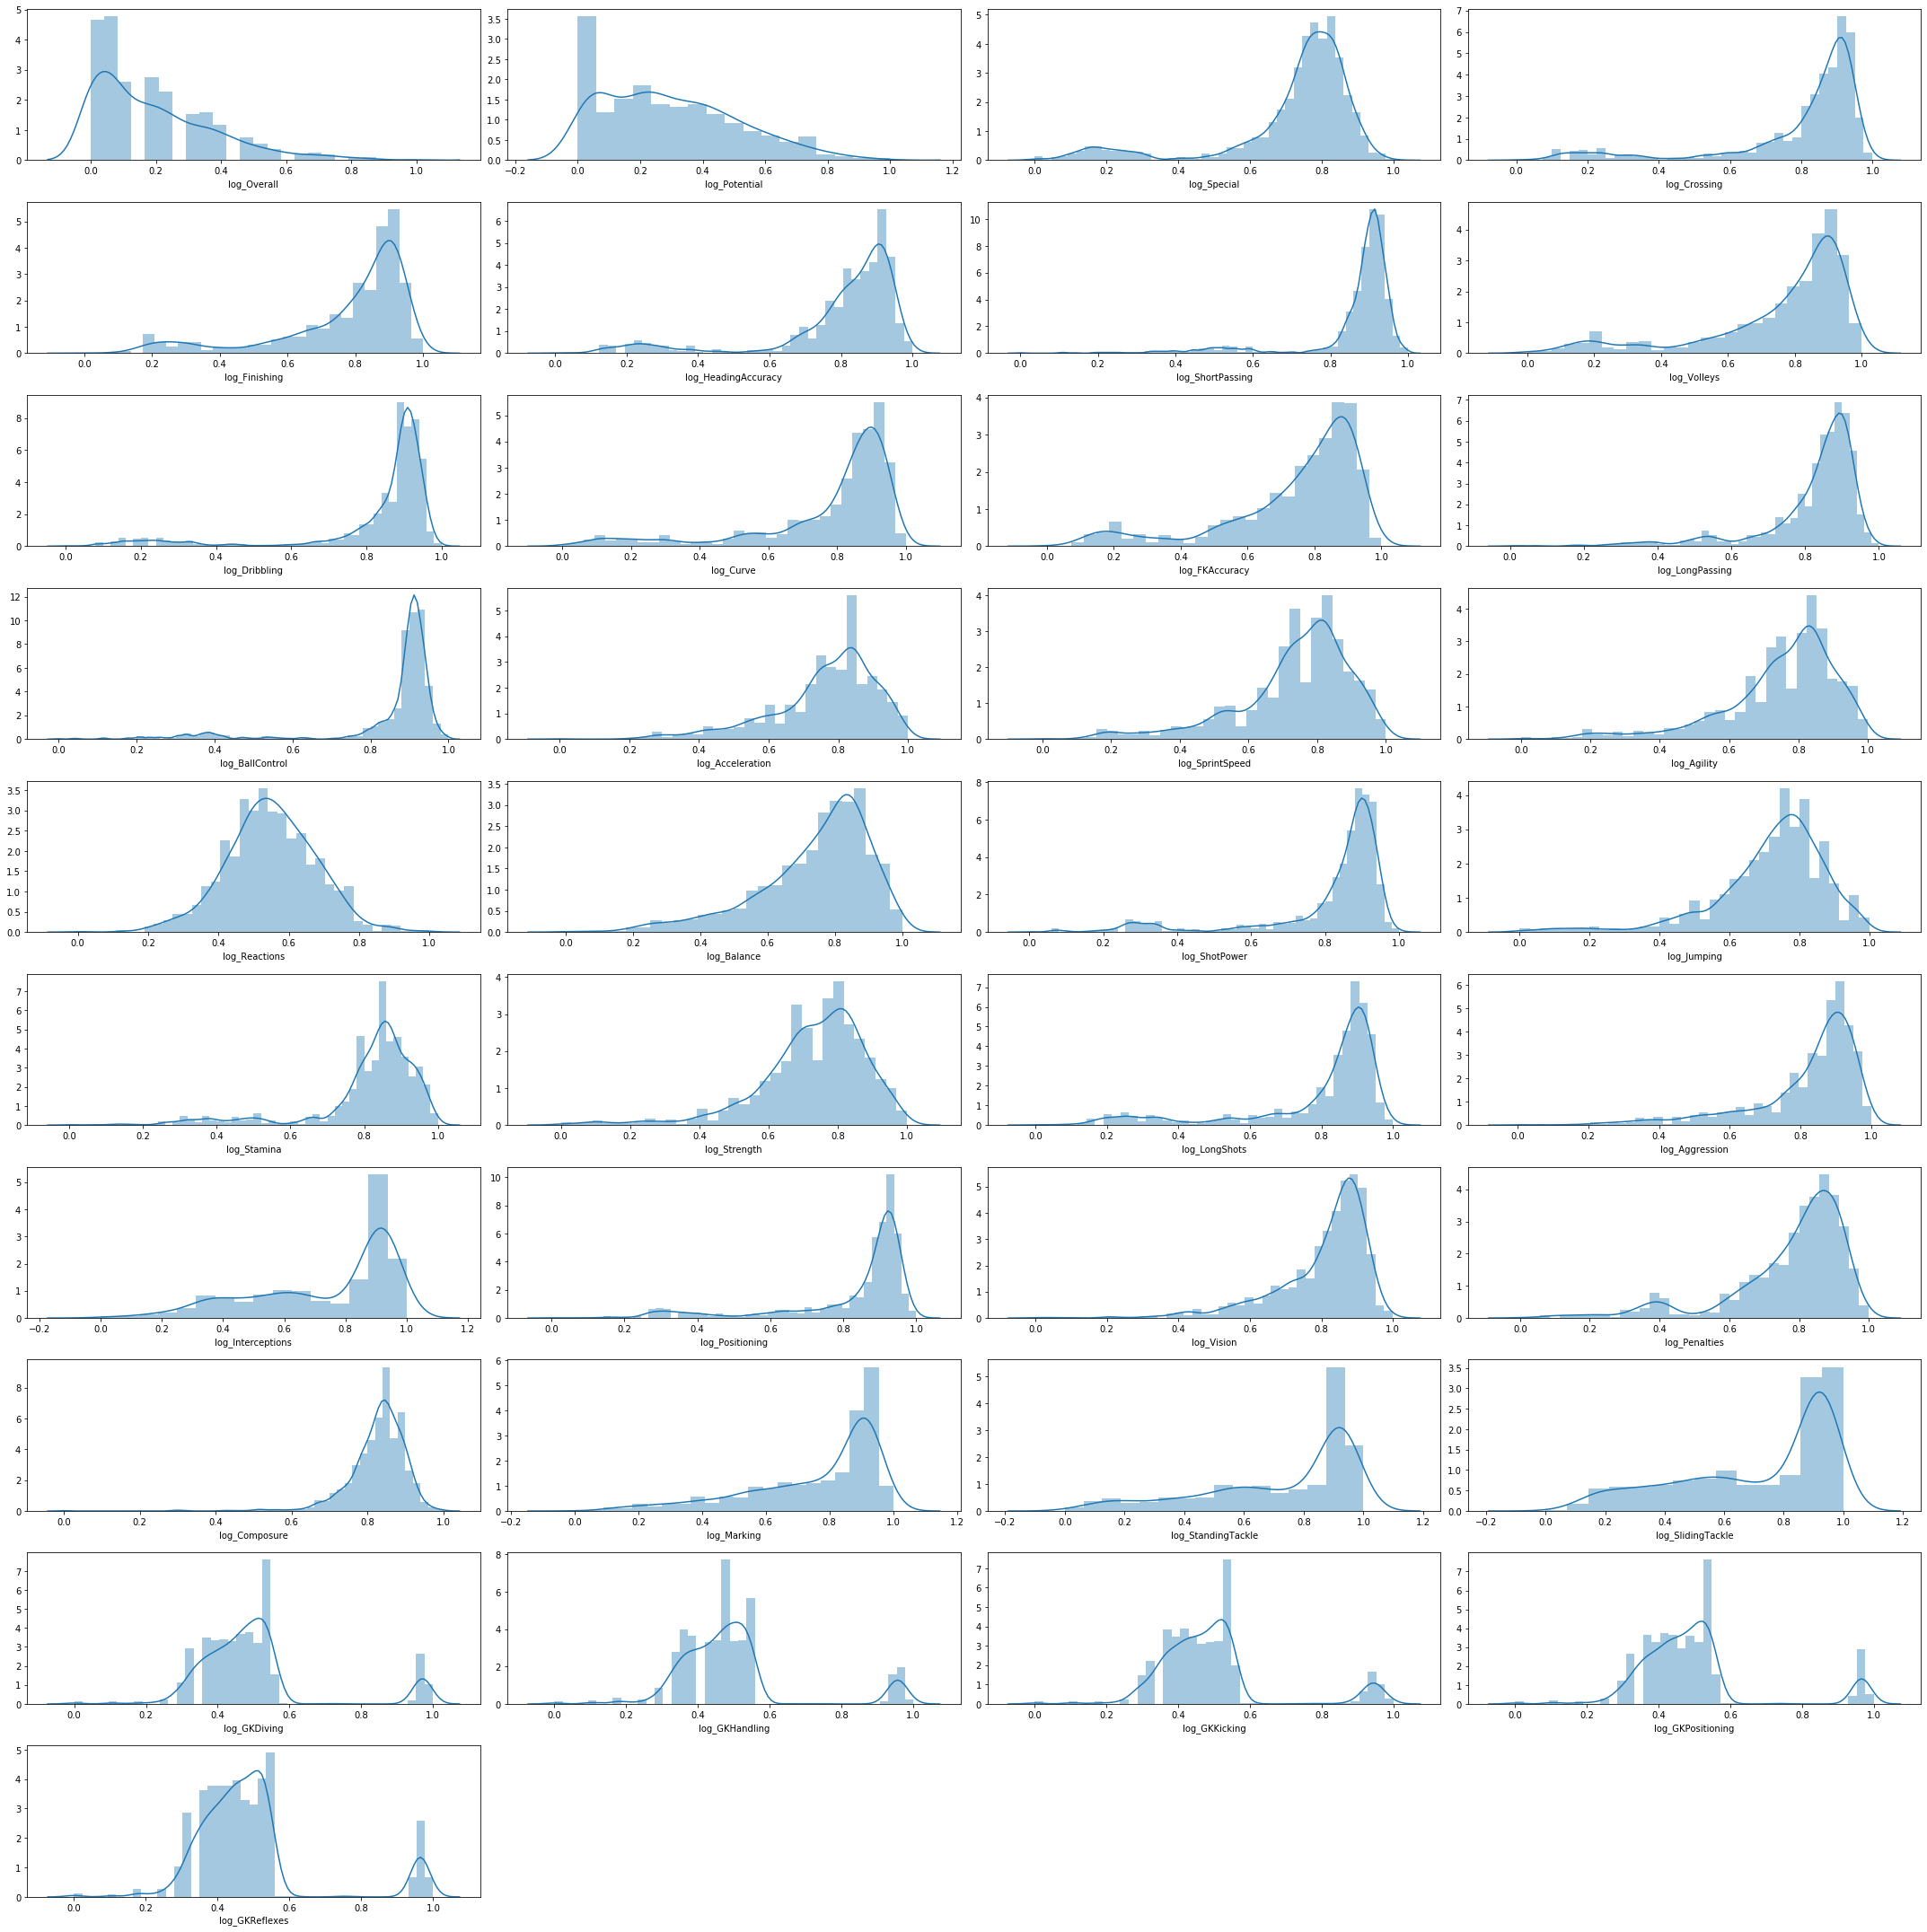

In [37]:
fig = plt.figure(figsize = (30, 30))

for i in range(len(log_third_columns)):
    fig.add_subplot(10, 4, i+1)
    sns.distplot(scaled_third[log_third_columns[i]])

plt.tight_layout()
plt.show()

In [38]:
print(scaled_first.shape)
print(scaled_second.shape)
print(scaled_third.shape)

(1406, 8)
(1406, 3)
(1406, 37)


In [39]:
final_df = pd.concat([scaled_first, scaled_second, scaled_third], axis = "columns")

In [40]:
final_df

Nationality       Age      Club  Work Rate  Position  Years in Contract  \
0        0.278195  0.695652  1.000000   0.110119  0.989011               0.20   
1        0.526316  0.608696  0.933333   1.000000  0.021978               0.85   
2        0.744361  0.391304  0.933333   0.770833  0.241758               0.25   
3        1.000000  0.434783  1.000000   1.000000  1.000000               0.45   
4        0.150376  0.434783  0.933333   0.377976  0.406593               0.40   
...           ...       ...       ...        ...       ...                ...   
1401     0.533835  0.608696  0.600000   0.770833  0.703297               0.30   
1402     0.060150  0.608696  0.133333   0.104167  0.703297               0.15   
1403     0.000000  0.739130  0.666667   0.392857  0.681319               0.20   
1404     0.383459  0.695652  0.133333   0.770833  0.263736               0.20   
1405     0.007519  0.434783  0.066667   0.770833  0.989011               0.15   

      Height(cm)  Weight(kg)  Value(Million)  Wage(Million)  ...  \
0       0.705882    0.618557        0.649787       0.716312  ...   
1       0.294118    0.371134        0.932489       1.000000  ...   
2       0.411765    0.278351        1.000000       0.512411  ...   
3       0.823529    0.463918        0.607593       0.459220  ...   
4       0.529412    0.319588        0.860759       0.627660  ...   
...          ...         ...             ...            ...  ...   
1401    0.411765    0.298969        0.059067       0.046099  ...   
1402    0.294118    0.237113        0.059067       0.047872  ...   
1403    0.411765    0.505155        0.019404       0.083333  ...   
1404    0.470588    0.463918        0.040501       0.028369  ...   
1405    0.294118    0.237113        0.067506       0.015957  ...   

      log_Penalties  log_Composure  log_Marking  log_StandingTackle  \
0          0.964910       0.993228     0.520464            0.519099   
1          0.909478       1.000000     0.584747            0.475167   
2          0.943552       0.986385     0.506282            0.408929   
3          0.632725       0.777410     0.280123            0.351878   
4          0.932479       0.943749     0.870770            0.792138   
...             ...            ...          ...                 ...   
1401       0.810887       0.865858     0.764154            0.595794   
1402       0.891418       0.748360     0.596462            0.607386   
1403       0.756228       0.786813     0.915103            0.899225   
1404       0.909478       0.849100     0.572683            0.583892   
1405       0.878961       0.840557     0.596462            0.371717   

      log_SlidingTackle  log_GKDiving  log_GKHandling  log_GKKicking  \
0              0.421941      0.363122        0.466671       0.543128   
1              0.472610      0.328145        0.466671       0.543128   
2              0.571779      0.421571        0.419184       0.543128   
3              0.190071      1.000000        0.979619       0.988390   
4              0.754558      0.544683        0.506820       0.286946   
...                 ...           ...             ...            ...   
1401           0.503351      0.421571        0.391743       0.526271   
1402           0.608154      0.363122        0.444008       0.558962   
1403           0.934465      0.490294        0.391743       0.467988   
1404           0.558936      0.527778        0.444008       0.420368   
1405           0.421941      0.490294        0.419184       0.420368   

      log_GKPositioning  log_GKReflexes  
0              0.527778        0.464099  
1              0.527778        0.389584  
2              0.544683        0.464099  
3              0.994179        1.000000  
4              0.446537        0.504027  
...                 ...             ...  
1401           0.490294        0.389584  
1402           0.393973        0.504027  
1403           0.469328        0.464099  
1404           0.328145        0.416874  
1405           0.469328        0.484

## Dimensionality Reduction and Checking optimal No of Clusters using Various Techniques

In [41]:
## Dimensionality Reduction to check for possible clusters
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

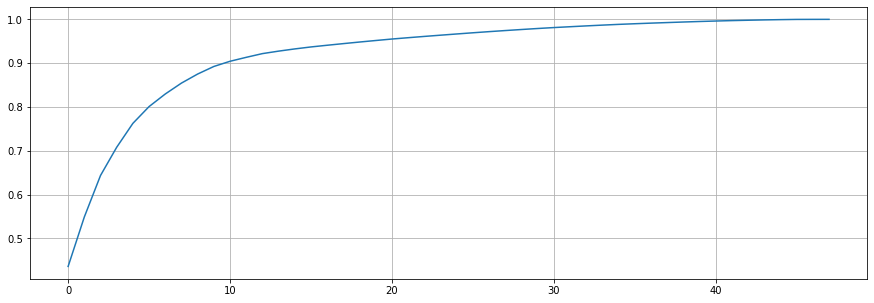

In [42]:
pca = PCA().fit(final_df)
plt.figure(figsize = (15, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [43]:
pca = PCA(n_components = 40, random_state = 20)
pca_data = pca.fit_transform(final_df)

In [44]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters = k, max_iter = 100, n_jobs = -1)
    km.fit(pca_data)
    inertias.append(km.inertia_)

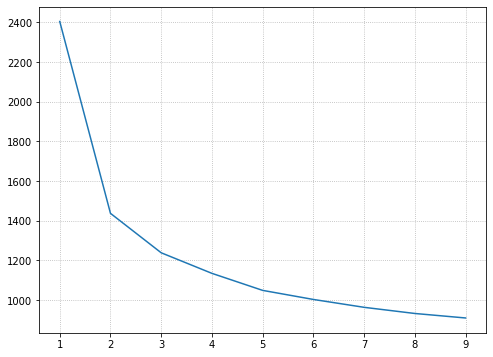

In [45]:
plt.figure(figsize = (8,6))
plt.plot(K, inertias)
plt.grid(linestyle = ":")
plt.show()

In [46]:
pca = PCA(n_components = 2, random_state = 20)
pca_data = pca.fit_transform(final_df)

tsne = TSNE(n_components = 2, random_state = 20)
tsne_data = tsne.fit_transform(final_df)

In [47]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters = k, max_iter = 100, n_jobs = -1)
    km.fit(pca_data)
    inertias.append(km.inertia_)

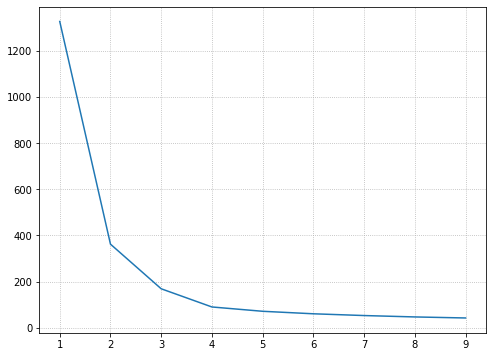

In [48]:
plt.figure(figsize = (8,6))
plt.plot(K, inertias)
plt.grid(linestyle = ":")
plt.show()

In [49]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters = k, max_iter = 100, n_jobs = -1)
    km.fit(tsne_data)
    inertias.append(km.inertia_)

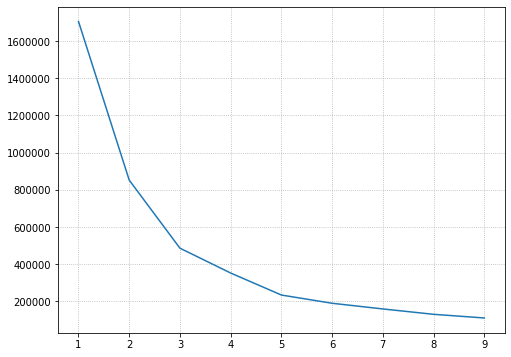

In [50]:
plt.figure(figsize = (8,6))
plt.plot(K, inertias)
plt.grid(linestyle = ":")
plt.show()

In [51]:
km = KMeans(n_clusters = 2, n_jobs = -1)
km.fit(pca_data)
predictions = km.predict(pca_data)

In [52]:
pca_features = pd.DataFrame(pca_data, columns = ["feature1", "feature2"])
predictions = pd.DataFrame(predictions, columns = ["Predictions"])
pca_df = pd.concat([pca_features, predictions], axis = "columns")

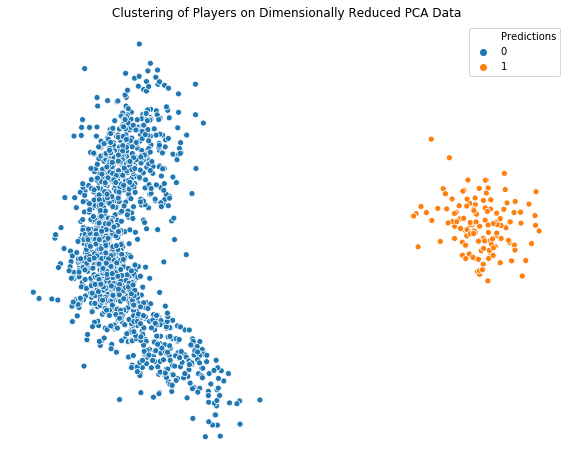

In [53]:
plt.figure(figsize = (10,8))
sns.scatterplot(pca_df["feature1"], pca_df["feature2"], hue = pca_df["Predictions"])
plt.grid(linestyle = ":")
plt.title("Clustering of Players on Dimensionally Reduced PCA Data")
plt.axis("off")
plt.show()

In [54]:
## TSNE Method
tsne = TSNE(n_components = 2, n_jobs = -1)
tsne_data = tsne.fit_transform(final_df)

km = KMeans(n_clusters = 2, n_jobs = -1)
km.fit(tsne_data)
predictions = km.predict(tsne_data)

tsne_features = pd.DataFrame(tsne_data, columns = ["feature1", "feature2"])
predictions = pd.DataFrame(predictions, columns = ["Predictions"])
tsne_cluster = pd.concat([tsne_features, predictions], axis = "columns")

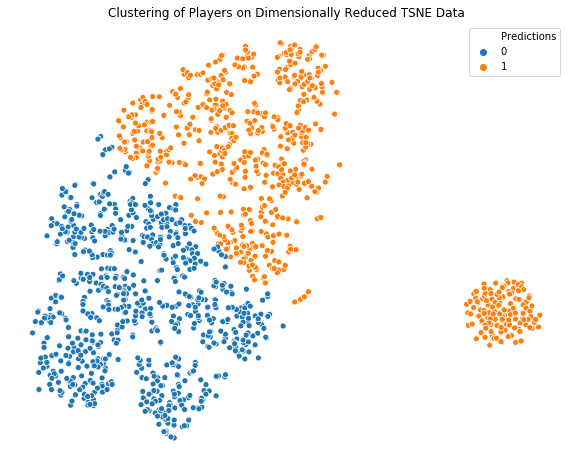

In [55]:
plt.figure(figsize = (10,8))
sns.scatterplot(tsne_cluster["feature1"], tsne_cluster["feature2"], hue = tsne_cluster["Predictions"])
plt.grid(linestyle = ":")
plt.title("Clustering of Players on Dimensionally Reduced TSNE Data")
plt.axis("off")
plt.show()

In [56]:
km = KMeans(n_clusters = 3, n_jobs = -1)
km.fit(pca_data)
predictions = km.predict(pca_data)

In [57]:
pca_features = pd.DataFrame(pca_data, columns = ["feature1", "feature2"])
predictions = pd.DataFrame(predictions, columns = ["Predictions"])
pca_df = pd.concat([pca_features, predictions], axis = "columns")

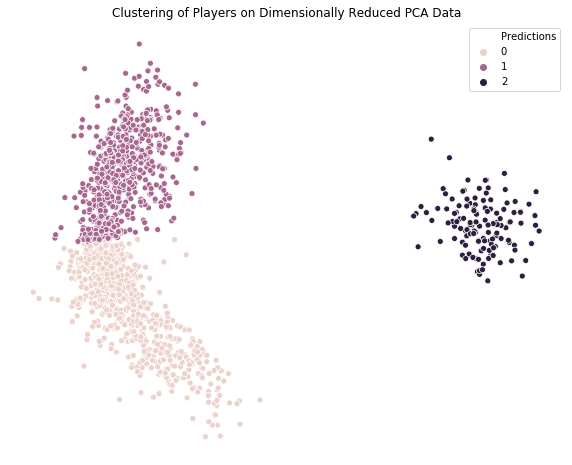

In [58]:
plt.figure(figsize = (10,8))
sns.scatterplot(pca_df["feature1"], pca_df["feature2"], hue = pca_df["Predictions"])
plt.grid(linestyle = ":")
plt.title("Clustering of Players on Dimensionally Reduced PCA Data")
plt.axis("off")
plt.show()

In [59]:
## TSNE Method
tsne = TSNE(n_components = 2, n_jobs = -1)
tsne_data = tsne.fit_transform(final_df)

km = KMeans(n_clusters = 3, n_jobs = -1)
km.fit(tsne_data)
predictions = km.predict(tsne_data)

tsne_features = pd.DataFrame(tsne_data, columns = ["feature1", "feature2"])
predictions = pd.DataFrame(predictions, columns = ["Predictions"])
tsne_cluster = pd.concat([tsne_features, predictions], axis = "columns")

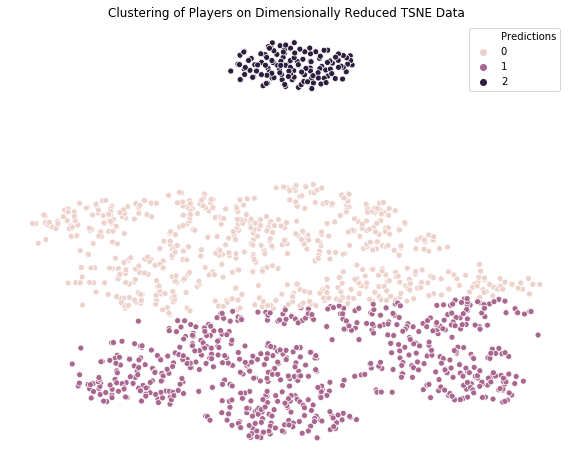

In [60]:
plt.figure(figsize = (10,8))
sns.scatterplot(tsne_cluster["feature1"], tsne_cluster["feature2"], hue = tsne_cluster["Predictions"])
plt.grid(linestyle = ":")
plt.title("Clustering of Players on Dimensionally Reduced TSNE Data")
plt.axis("off")
plt.show()

In [61]:
km = KMeans(n_clusters = 4, n_jobs = -1)
km.fit(pca_data)
predictions = km.predict(pca_data)

In [62]:
pca_features = pd.DataFrame(pca_data, columns = ["feature1", "feature2"])
predictions = pd.DataFrame(predictions, columns = ["Predictions"])
pca_df = pd.concat([pca_features, predictions], axis = "columns")

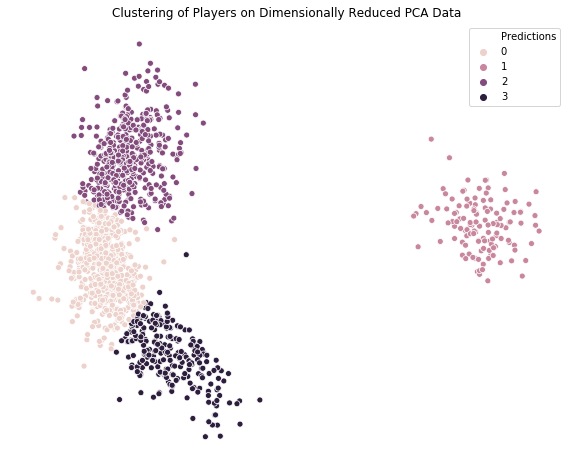

In [63]:
plt.figure(figsize = (10,8))
sns.scatterplot(pca_df["feature1"], pca_df["feature2"], hue = pca_df["Predictions"])
plt.grid(linestyle = ":")
plt.title("Clustering of Players on Dimensionally Reduced PCA Data")
plt.axis("off")
plt.show()

In [64]:
## TSNE Method
tsne = TSNE(n_components = 2, n_jobs = -1)
tsne_data = tsne.fit_transform(final_df)

km = KMeans(n_clusters = 5, n_jobs = -1)
km.fit(tsne_data)
predictions = km.predict(tsne_data)

tsne_features = pd.DataFrame(tsne_data, columns = ["feature1", "feature2"])
predictions = pd.DataFrame(predictions, columns = ["Predictions"])
tsne_cluster = pd.concat([tsne_features, predictions], axis = "columns")

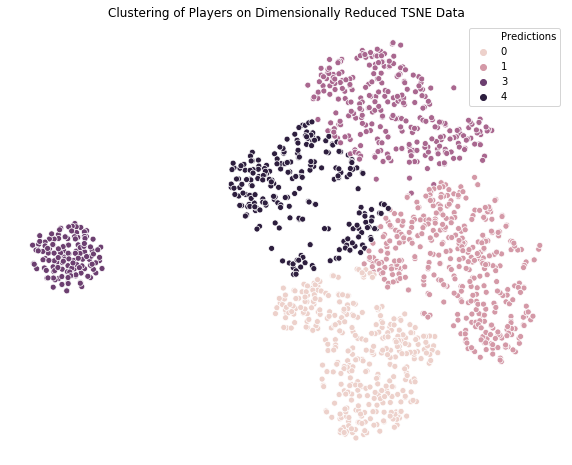

In [65]:
plt.figure(figsize = (10,8))
sns.scatterplot(tsne_cluster["feature1"], tsne_cluster["feature2"], hue = tsne_cluster["Predictions"])
plt.grid(linestyle = ":")
plt.title("Clustering of Players on Dimensionally Reduced TSNE Data")
plt.axis("off")
plt.show()

In [66]:
## Covariace matrix to check for features having high covariance
corr = final_df.corr()
abs_corr = abs(corr)

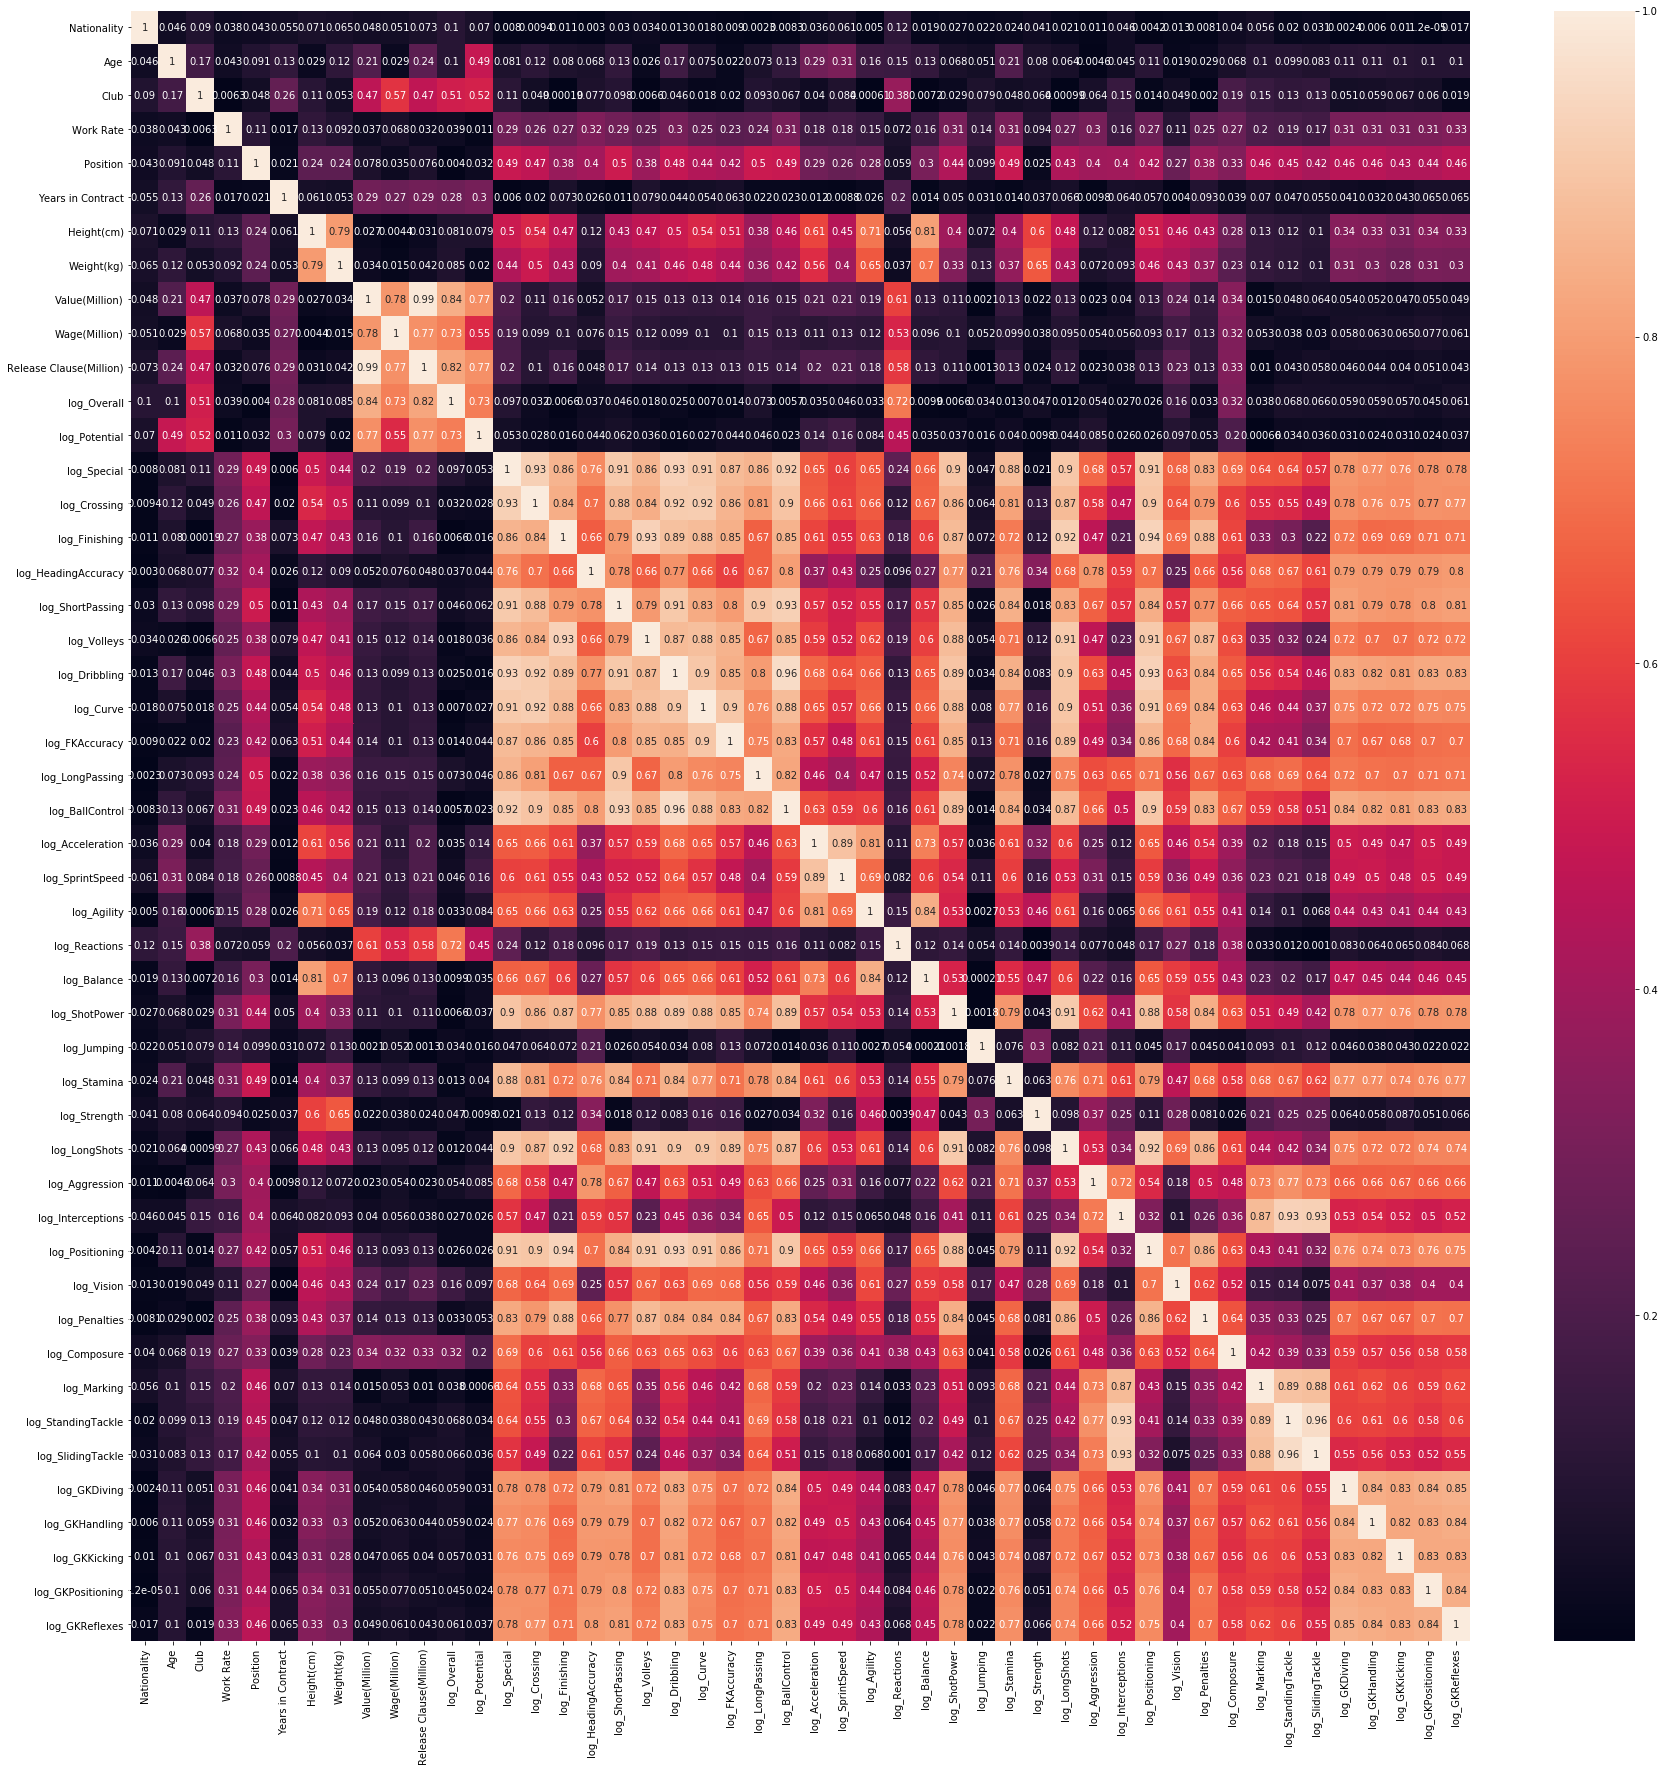

In [67]:
plt.figure(figsize = (30, 30))
sns.heatmap(abs_corr, annot = True)
plt.show()

In [68]:
## Neighbor Matrix

In [69]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx

In [70]:
nbrs = NearestNeighbors(n_neighbors = 5, n_jobs = -1)
nbrs.fit(final_df)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [71]:
players_distances = nbrs.kneighbors(final_df)[0]
similar_players = nbrs.kneighbors(final_df)[1]

## The below code snippet will give you a list 5 most similar Players wrt to the one you give as input

In [72]:
df.iloc[similar_players[3]]

Name  Age Nationality  Overall  Potential               Club  \
3          De Gea   27       Spain       91         93  Manchester United   
56        Ederson   24      Brazil       86         90    Manchester City   
15  M. ter Stegen   26     Germany       89         92       FC Barcelona   
24       M. Neuer   32     Germany       89         89  FC Bayern München   
79        Alisson   25      Brazil       85         90          Liverpool   

     Value   Wage  Special Preferred Foot  ...  Composure  Marking  \
3     €72M  €260K     1471          Right  ...       68.0     15.0   
56  €41.5M  €125K     1463           Left  ...       70.0     28.0   
15    €58M  €240K     1328          Right  ...       69.0     25.0   
24    €38M  €130K     1473          Right  ...       70.0     17.0   
79  €36.5M  €115K     1320          Right  ...       65.0     15.0   

    StandingTackle SlidingTackle GKDiving GKHandling  GKKicking GKPositioning  \
3             21.0          13.0     90.0       85.0       87.0          88.0   
56            15.0           8.0     85.0       80.0       91.0          82.0   
15            13.0          10.0     87.0       85.0       88.0          85.0   
24            10.0          11.0     90.0       86.0       91.0          87.0   
79            19.0          16.0     83.0       81.0       85.0          84.0   

   GKReflexes Release Clause  
3        94.0        €138.6M  
56       87.0         €79.9M  
15       90.0        €123.3M  
24       87.0         €62.7M  
79       88.0         €72.1M  

[5 rows x 56 columns]

In [ ]:
# 2 Cluster view of all the 1406 players 

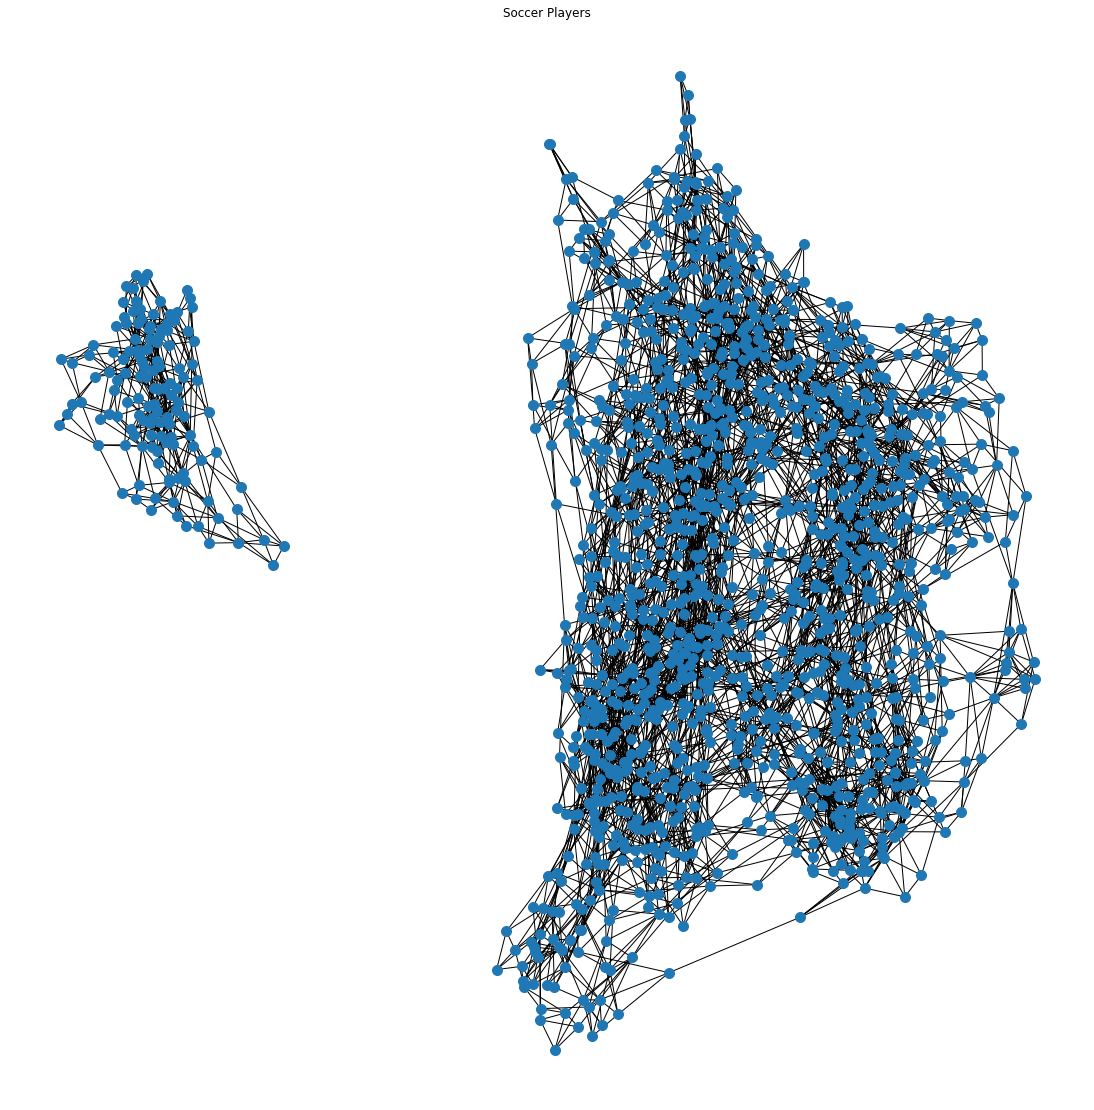

In [73]:
plt.figure(figsize = (15, 15))
G = nx.from_scipy_sparse_matrix(nbrs.kneighbors_graph(final_df))
nx.draw(G, node_size = 100)
plt.title("Soccer Players")
plt.show()

In [74]:
import plotly.graph_objects as go

In [75]:
G = nx.from_scipy_sparse_matrix(nbrs.kneighbors_graph(final_df))
G = nx.DiGraph(G)
pos = nx.fruchterman_reingold_layout(G, seed = 12)

In [76]:
for n, p in pos.items():
    G.nodes[n]["pos"] = p

In [77]:
edge_x = []
edge_y = []
x0_ = []
x1_ = []
y0_ = []
y1_ = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    x0_.append(x0 - 0.01)
    x1_.append(x1 - 0.01)
    y0_.append(y0)
    y1_.append(y1)

edge_trace = go.Scatter(
    x = edge_x,
    y = edge_y,
    line = dict(width = 0.5, color = '#888'),
    hoverinfo = 'none',
    mode = 'lines')

In [78]:
node_x = []
node_y = []
for node in G.nodes:
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x = node_x , y = node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [79]:
node_adjacencies = []
node_text = []

for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections for Node {} is {} '.format(str(node),str(len(adjacencies[1])-1)))
    
node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [80]:
fig1 = go.Figure(data = [edge_trace, node_trace],
                layout = go.Layout(
                    title = "<br>Soccer Players Cluster",
                    titlefont_size = 14,
                    showlegend = False,
                    hovermode = 'closest',
                    plot_bgcolor = "white",
                    height = 900,
                    width = 1800,
                    #annotations = [
                    #    dict(ax = x0_[i], ay = y0_[i], axref = 'x', ayref = 'y', 
                    #                    x = x1_[i], y = y1_[i], xref = 'x', yref = 'y', 
                    #                    showarrow = True, arrowhead = 1) for i in range(0, len(x0_))
                    #              ],
                    margin = dict(b = 20, l = 5, r = 5, t = 40),
                xaxis = dict(showgrid = False, zeroline = False, showticklabels = False),
                yaxis = dict(showgrid = False, zeroline = False, showticklabels = False))
                )

#fig1.show()

In [81]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Build App
app = JupyterDash(__name__)
#app = JupyterDash(external_stylesheets = [dbc.themes.BOOTSTRAP])

row = html.Div([
    html.Div([
        html.Div([
            dcc.Graph(figure = fig1)
        ], style = {"height" : "100%", "width" : "100%", "float" : "left"}
        ),
    ])   
], style = {'height' : '100%', 'width' : '100%'})

app.layout = row

app.run_server(mode = 'external')

## Click on the below link after running the whole Notebook to see an interactive version of the Cluster based Network Plot

Dash app running on http://127.0.0.1:8050/


In [88]:
## Implementation of DBSCAN Clustering Method to find optimal Clusters
from sklearn.cluster import DBSCAN

original_clusters = DBSCAN().fit_predict(final_df)
orig_predictions = pd.DataFrame(original_clusters, columns = ["Orig_Predictions"])

pca = PCA(n_components = 2, random_state = 20)
pca_data = pca.fit_transform(final_df)
pca_clusters = DBSCAN().fit_predict(pca_data)

pca_features = pd.DataFrame(pca_data, columns = ["feature1", "feature2"])
pca_predictions = pd.DataFrame(pca_clusters, columns = ["Predictions"])
pca_df = pd.concat([pca_features, pca_predictions, orig_predictions], axis = "columns")

tsne = TSNE(n_components = 2, random_state = 20)
tsne_data = tsne.fit_transform(final_df)
tsne_clusters = DBSCAN().fit_predict(tsne_data)

tsne_features = pd.DataFrame(tsne_data, columns = ["feature1", "feature2"])
tsne_predictions = pd.DataFrame(tsne_clusters, columns = ["Predictions"])
tsne_df = pd.concat([tsne_features, tsne_predictions, orig_predictions], axis = "columns")

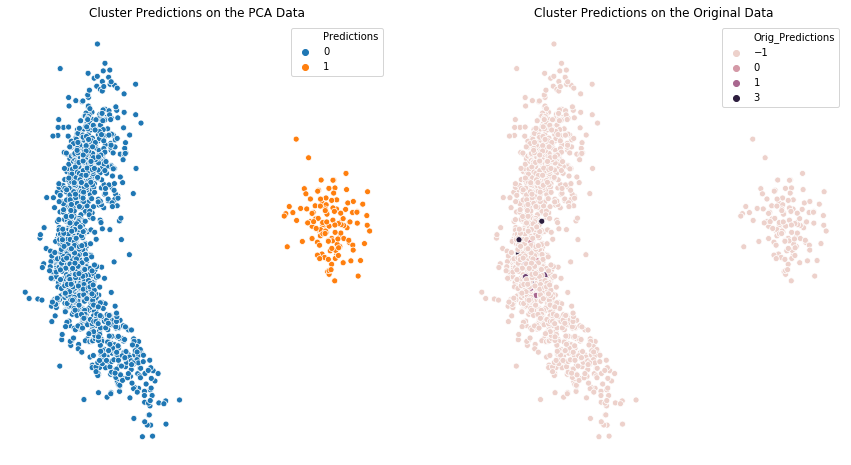

In [89]:
fig = plt.figure(figsize = (15, 8))

fig.add_subplot(1, 2, 1)
sns.scatterplot(pca_df["feature1"], pca_df["feature2"], hue = pca_df["Predictions"])
plt.axis("off")
plt.title("Cluster Predictions on the PCA Data")

fig.add_subplot(1, 2, 2)
sns.scatterplot(pca_df["feature1"], pca_df["feature2"], hue = pca_df["Orig_Predictions"])
plt.axis("off")
plt.title("Cluster Predictions on the Original Data")

plt.show()

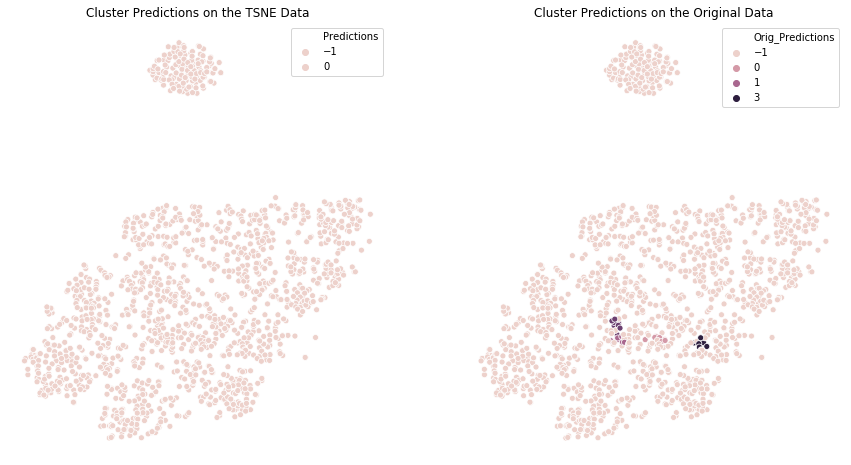

In [90]:
fig = plt.figure(figsize = (15, 8))

fig.add_subplot(1, 2, 1)
sns.scatterplot(tsne_df["feature1"], tsne_df["feature2"], hue = tsne_df["Predictions"])
plt.axis("off")
plt.title("Cluster Predictions on the TSNE Data")

fig.add_subplot(1, 2, 2)
sns.scatterplot(tsne_df["feature1"], tsne_df["feature2"], hue = tsne_df["Orig_Predictions"])
plt.axis("off")
plt.title("Cluster Predictions on the Original Data")

plt.show()